#STOCK PRICE PREDICTION OF S&P 500

# Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Step 2: Load Data

In [ ]:
df = pd.read_csv("/content/all_stocks_5yr.csv")
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


#**Step 3: Basic EDA**

##1. Dataset Info:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


##2. Summary Stats:

In [ ]:
df.describe()

,date,open,high,low,close,volume
count,619040,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,2015-08-18 00:48:23.494443264,83.023334,83.778311,82.256096,83.043763,4.321823e+06
min,2013-02-08 00:00:00,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,2014-05-20 00:00:00,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,2015-08-21 00:00:00,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,2016-11-15 00:00:00,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2018-02-07 00:00:00,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08
std,NaN,97.378769,98.207519,96.507421,97.389748,8.693610e+06


##3. Null Value Check:

In [ ]:
df.isnull().sum()

,0
date,0
open,11
high,8
low,8
close,0
volume,0
Name,0


##4. Number of Unique Stocks:

In [ ]:
print("Total companies:", df['Name'].nunique())

Total companies: 505


##5. Top 5 companies by volume:

In [ ]:
df.groupby('Name')['volume'].mean().sort_values(ascending=False).head()

,volume
Name,
BAC,9.363380e+07
AAPL,5.404790e+07
GE,4.211568e+07
F,3.446237e+07
FB,3.435927e+07


##6. Plot sample price trends:

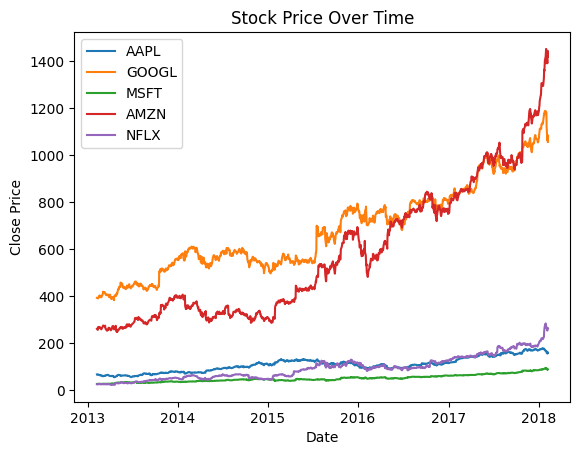

In [ ]:
sample_stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'NFLX']
for stock in sample_stocks:
    subset = df[df['Name'] == stock]
    plt.plot(subset['date'], subset['close'], label=stock)

plt.legend()
plt.title("Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


# Step 4: Pivot Data for PCA

In [ ]:
price_df = df.pivot(index='date', columns='Name', values='close')
price_df = price_df.dropna(axis=1)  # drop stocks with missing prices

#Step 5: Calculate Daily Returns

In [ ]:
returns = price_df.pct_change().dropna()

#Step 6: Correlation Heatmap of Returns

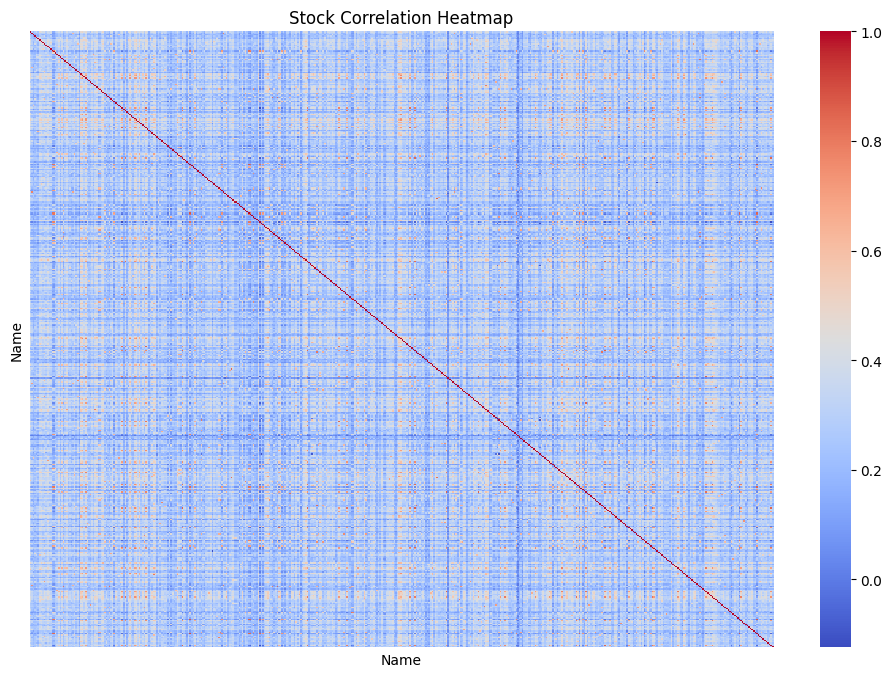

In [ ]:
corr_matrix = returns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title("Stock Correlation Heatmap")
plt.show()


#Step 7: Standardize the Returns

In [ ]:
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns)

#Step 8: Apply PCA

In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(returns_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.29841406 0.05491233]


#Step 9: Visualize PCA Results

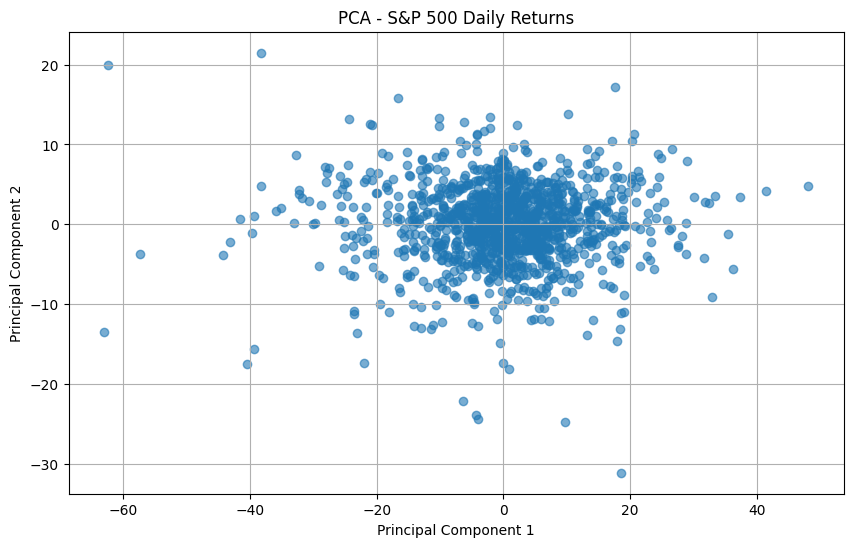

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.6)
plt.title("PCA - S&P 500 Daily Returns")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

#Step 10: Analyze Top Contributing Stocks

###Get the first principal component

In [ ]:
pc1 = pca.components_[0]
tickers = price_df.columns

###Top 10 movers on PC1

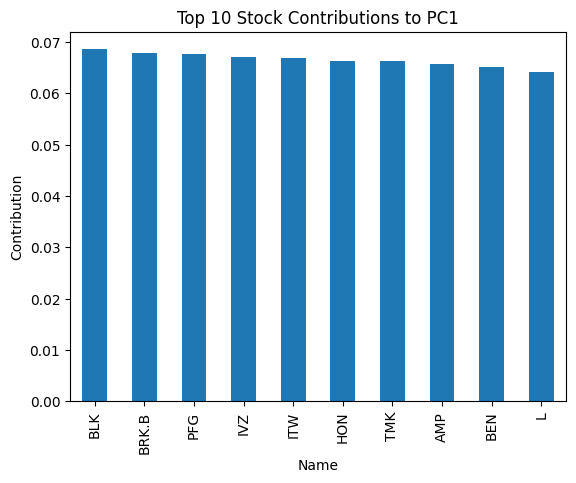

In [ ]:
pc1_contrib = pd.Series(pc1, index=tickers)
top_stocks = pc1_contrib.abs().sort_values(ascending=False).head(10)

top_stocks.plot(kind='bar', title='Top 10 Stock Contributions to PC1')
plt.ylabel('Contribution')
plt.show()